# Titanic Survival Probabilities 
-----
### This notebook aims to calculate the metrics of survival probabilities for the passengers on the Titanic voyage. We will look at the effect of sex/gender, class, age and port of embarkment on each individuals chance of survival. 

In [1]:
# graph imformation
%matplotlib notebook
import matplotlib.pyplot as plt #matlab plots
import seaborn as sns 
sns.set_style('whitegrid') # style preference on graphs

#useful packages for math, statistics and dictionaries 
from scipy import stats 
import numpy as np  
import collections #ordered dictionary

#importing,cleaning and managing datasets 
import pandas as pd 
from pandas import Series,DataFrame

#machine learning packages
from sklearn import ensemble, tree, model_selection 
# ensemble = random forest
# tree = decision tree 

# for generating random seeds in the game 
from random import seed, random
# seed random number generator
seed(1)

from ansimarkup import parse, ansiprint # colour print statements
import time # adds delays for gamer to read script


train_data = pd.read_csv('data/titanic_train.csv')
test_data = pd.read_csv('data/titanic_test.csv')

# Gamify the Statistics
## Let’s see if you can survive the sinking of the titanic! 

Before we jump in let’s see if you know how to survive the sinking! Then we can dive into why you may have survived or died in the game. First, we have to load the cells that clean the data (7) and has the ML algorithm training (29) so we can use it in the game.


In [2]:
%%javascript
Jupyter.notebook.execute_cells([7]) 
Jupyter.notebook.execute_cells([29]) 

<IPython.core.display.Javascript object>

In [21]:
# the game definitions  
def intro(): 
    # sets out some of the main parameters of the game, sex, age, class
    ansiprint("<b,g,>James:</b,g,>",\
        "<g>Hello, Welcome aboard the Titanic! My name is James, I am one of the crew members aboard this unsinkable ship.</g>",\
        "<g>      May I take your name and see your ticket for the passenger list, please?</g>", sep="\n")
    time.sleep(7)
    name = str(input("Your name: "))
    name = name.strip()
    time.sleep(2)
    ansiprint("<b,g,>James:</b,g,><g> Nice to meet you, %s. I will take your ticket now.</g>" %name)
    time.sleep(2)
    ansiprint("<b>You hand your ticket over to James for inspection.</b>", " ", sep="\n")
    time.sleep(2)
    check_ticket("Y", "James") 

    sex = str(input("What is your gender, Male or Female? ")).upper().strip()
    title, sex_bin, sex = sex_loop(sex)
    
    time.sleep(2)
    ansiprint("<b,g,>James:</b,g,><g> %s, Can you tell me your age?</g>"%title[1]) 
    time.sleep(0.5)
    age = int(input("What is your age: "))
    time.sleep(0.5)
    age = age_loop(age,"James")
    
    time.sleep(2)
    ansiprint("<b,g,>James:</b,g,><g> Its a beautiful day here today in.... Oh, wait where are we again?</g>",\
             "<g>      I have been doing so much travelling I forgot which port this is!</g>", sep="\n")
    time.sleep(5)
    ansiprint('Your port:','1 = Southhampton, England', '2 = Cherbourg, France', '3 = Queenstown, Ireland', sep="\n")
    time.sleep(5)
    port = str(input()).strip()
    port = port_loop(port)
        
    ansiprint("<b,g,>James:</b,g,>", "<g>%s, Can you tell me which Class you booked?</g>" %title[1])
    print('Pick your class number:','1 = First class', '2 = Second class', '3 = Third Class', sep="\n")
    pclass = int(input())
    pclass = class_loop(pclass, "James")

    return name, age, sex_bin, sex, pclass, port, title

def len_adjust(string): 
    # adjusts a string to the first character
    if len(string) >1: 
        string = string[0]
    return string

def check_ticket(ticket, chr_name):
    # "looks at the ticket, and prints out info for the viewer"
    ticket_loop = True
    while ticket_loop: 
        ticket = len_adjust(ticket)
        if (ticket == "Y"): 
            ansiprint("<b>He rips the detachable strip down the side of your ticket and begins to read your details.</b>")
            time.sleep(2)
            ansiprint("<b,g,>%s:</b,g,> <g>Your ticket has become quite unreadable I'm afraid.</g>"%chr_name,\
                      "<g>I will need you to tell me some of your missing details.</g>")
            time.sleep(2)
            ticket_loop = False  
    return 

def sex_loop(sex): 
    # sets the sex_bin to 0 or 1, makes a title array with apporpriate titles, and sets sex = "M" or "F"
    sex_loop = True
    while sex_loop: 
        sex = len_adjust(sex)    
        if (sex != "M") and (sex != "F"): 
            dice_loop = True
            while dice_loop: 
                ansiprint("<b>Sorry, binary due to the fact that its 1912 and there is no non-binary data</b>",'  ', sep="\n")
                time.sleep(2)
                ansiprint("<b>would you like to roll the dice? </b>",'  ', sep="\n")
                time.sleep(2)
                dice = str(input("Y for random assignment, N to choose assignment: ")).strip().upper()
                dice = len_adjust(dice)
                if dice == "Y":
                    dice_loop = False
                    ansiprint("<b>Rolling the dice for random assignment</b>",'  ', sep="\n")
                    time.sleep(2)
                    ran = random()
                    if ran<= 0.5: 
                        sex= 'M'
                    else:
                        sex= "F"
                elif dice == "N": 
                    sex = str(input("What is your gender, Male or Female? ")).upper().strip()
                    sex = len_adjust(sex)
                    if (sex == "M") or (sex =="F"): dice_loop = False
                else: 
                    dice_loop = True
    
        if sex == "M": 
            sex_bin = 0
            title = ["Mr.", "Sir"]
            assign = "Male"
            sex_loop = False
        else: 
            sex_bin = 1 
            title = ["Ms.", "Miss"]
            assign = "Female"
            sex_loop= False
    time.sleep(2)
    print(" ","You have %s as your gender" %assign,'  ', sep="\n")
    return title, sex_bin, sex

def age_loop(age, chr_name): 
    # determines the age of the character if players try and use values not possible
    age_loop = True
    three_attempts = 0
    while age_loop: 
        if age <0: # negative numbers
            age = abs(age)
            ansiprint("<b,g,>%s:</b,g,><g> A negative age?</g>"%chr_name, "<g>I'm sure you meant %i </g>"%age,'  ', sep="\n")
            age_loop = False
        elif (81 <= age < 122): # pretty old but not unheard of
            ansiprint("<b,g,>%s:</b,g,><g> Thats getting up there. My Granny's that age as well.</g>"%chr_name,'  ', sep="\n")  
            age_loop = False
        elif age >= 122: # no one alive is that old
            three_attempts += 1
            if three_attempts <3: 
                ansiprint("<b,g,>%s:</b,g,> <g>Ha Ha. Sometimes we all feel that old, but what is your"\
                      " actual age now? </g>" %chr_name,'  ', sep="\n")
                age = int(input('new age: '))
            else: 
                age = int(random()*100)
                ansiprint("<b,g,>%s:</b,g,> <g>You're quite the trouble maker arn't ya?</g>"%chr_name, \
                          "<g>You look about %i to me so thats what's going in the passenger log.</g>"%age)
                print(" ")
                age_loop = False
        else: # age between 0 and 100
            ansiprint("<b,g,>%s:</b,g,><g> Thank you!</g>" %chr_name, " ",sep="\n")
            age_loop = False

    return age

def class_loop(pclass, chr_name): 
    #determines the class of the person, if they dont put in correct numbers then after 3 tries are randomly 
    # assigned to a class 
    class_loop = True
    t_loop=0
    while class_loop:
        # trouble makers
        if ((pclass > 3) or (pclass < 1)) and (t_loop <=2): # low level
            t_loop +=1
            ansiprint("<b,g,>%s:</b,g,> <g>Sorry, what class what that?</g>" %chr_name,'  ', sep="\n")
            pclass = int(input("Choose class: "))
        elif ((pclass > 3) or (pclass < 1)) and (t_loop ==3): # last go around 
            ansiprint("<b,g,>%s:</b,g,> <g>Your holding up the line now</g>" %chr_name)
            ansiprint("<b>%s walks over to a bucket of keys, clearly meant for last minute ticket purchasers"\
                      " and grabs one at random.</b>" % chr_name)
            ansiprint("<b,g,>%s:</b,g,><g> This is the key to your randomly assigned room.",\
                      " You need to move out of the way so I can help the other passengers!</g>"%chr_name)
            ran = random()
            if ran < 2/3: 
                pclass = 2
            elif  2/3 <= ran < 5/6: 
                pclass = 3
            else: 
                pclass = 1 
            ansiprint("<b>You look at your newly assigned key which is labeled with 'Class %i'</b>"%pclass,\
                      '  ', sep="\n")
            class_loop = False
        # not trouble makers 
        elif (1 <= pclass <=3):
            ansiprint("<b,g,>%s:</b,g,> <g>Thank you for your cooperation today! It has been"\
                      " my pleasure to help you.</g>"%chr_name,'  ', sep="\n")
            class_loop = False 

    return pclass

def port_loop(port):
    # sets the port to 1,2,or 3, if they try to use numbers outside the selection then they have 3 shots to 
    # use an accepted number otherwise they are randomly assigned a port
    port_loop = True 
    port_try = 0
    ports = ["Southhampton, England", "Cherbourg, France", "Queenstown, Ireland"]
    while port_loop: 
        if ((port > "3") or (port < "1")) and (port_try <3): 
            port_try +=1
            ansiprint("<b,g,>James:</b,g,><g> I must have heard that wrong. What port did you say?</g>")
            time.sleep(2)
            port = str(input()).strip()
        elif ((port > "3") or (port < "1")) and (port_try == 3): 
            ran = random()
            port_loop = False
            if ran < 0.333333: 
                port = 1
            elif 0.333333 <= ran < 0.666666: 
                port = 2
            else: 
                port = 3 
            ansiprint("<b,g,>James:</b,g,><g> Oh yes, I remember now! We are in %s. Goodness, how forgetful of me!</g>"%ports[int(port)-1],\
                     '  ', sep="\n")
            time.sleep(2)
        else: # 1<= port <=3
            ansiprint("<b,g,>James:</b,g,><g> Of course, %s! How could I forget!?</g> "%ports[int(port)-1],'  ', sep="\n")
            time.sleep(2)
            port_loop = False
    return port

# gameify the results, Run the actual game 
start = True
the_game = True 
while the_game: 
    if start: 
        ansiprint("<b>You are a passenger on the titanic. Your goal is to survive the sinking!</b>",\
          "<b>You must choose your demographics carefully to win the game.</b>",\
          "<b>There are 4 demographics: age, sex (binary), class and the port of which you got on the titanic.</b>",\
                  '  ', sep="\n")
        time.sleep(9.5)
        ansiprint("<b>Good Luck!</b>", '  ', sep="\n")
        time.sleep(1)
    
    name, age, sex_bin, sex, pclass, port, title = intro()
    
    # random forest 
    choice_array = np.array([pclass, age, sex_bin, port])
    choice_array = choice_array.reshape(1, -1)
    live_or_die = fit_rf.predict(choice_array)
    live_or_die_pcnt = fit_rf.predict_proba(choice_array)
    
    ansiprint(" ",'<b>Calculating result for:</b>', sep="\n")
    time.sleep(2)
    print("Name: "+name,"Age: "+str(age),"Gender: "+str(sex),"Class: "+str(pclass),"Port: "+str(port)," ", sep="\n")
    time.sleep(5)
    ansiprint('<b>Chance of Survival:</b>', live_or_die_pcnt[0][1]*100)
    time.sleep(3)
    ansiprint("<b>...... and the result is........</b>", " ",sep="\n")
    time.sleep(5)
    if live_or_die == 0: 
        ansiprint("<b>You lose! Better luck next time.</b>")
        play_again = str(input('Try again? (Y/N)')).upper()
    else: 
        ansiprint("<b>You win! You have survived the Titanic sinking.</b>",\
        " ", sep="\n")   
        play_again = str(input('Play again? (Y/N)')).upper()
    
    start = False
    if play_again == 'N': 
        the_game = False 
        ansiprint("<b>Game Over</b>")

You are a passenger on the titanic. Your goal is to survive the sinking!
You must choose your demographics carefully to win the game.
There are 4 demographics: age, sex (binary), class and the port of which you got on the titanic.
  
Good Luck!
  
James:
Hello, Welcome aboard the Titanic! My name is James, I am one of the crew members aboard this unsinkable ship.
      May I take your name and see your ticket for the passenger list, please?
Your name: Sarah
James: Nice to meet you, Sarah. I will take your ticket now.
You hand your ticket over to James for inspection.
 
He rips the detachable strip down the side of your ticket and begins to read your details.
James: Your ticket has become quite unreadable I'm afraid. I will need you to tell me some of your missing details.
What is your gender, Male or Female? female
 
You have Female as your gender
  
James: Miss, Can you tell me your age?
What is your age: 30
James: Thank you!
 
James: Its a beautiful day here today in.... Oh, wait whe

In [22]:
# reload fresh unchanged training data 
train_data = pd.read_csv('data/titanic_train.csv')

#and our test data set
test_data = pd.read_csv('data/titanic_test.csv')

# By Hand Calculations
*** 
##### First, I will calculate the survival probability of each metric 'by hand', and display various graphs for visualizing the data. Then I will create my own survival probability function using the 'by hand' calculations that I will use to compare to a Machine Learning (ML) algorithm to see if we get the same answers. 
*****

We will take a look at all the metrics and calculate the survival percentage for each age, sex, port and class.

Some handy information to know about the Titanic: 
0. The maiden voyage of Titanic was supposed to leave Europe and arrive in New York City and then return 
    - Titanic set off on April 10 1912 and didn’t even make it through the first leg of the voyage
    - The titanic struck an Iceberg off the coast of Nova Scotia on April 14th and had sunk by April 15th 
1. There was an estimated 2,224 passengers and crew onboard 
2. Only 706 people survived: 
    - 492 passengers 
    - 214 crew
3. The survival rates (death rates) were: 
    - passengers: 37.36% (62.64%)
    - crew: 23.59% (76.41%)
    - overall: 31.74% (68.26%)
4. There were 112 children on board 
    - they accounted for 8.5% of the ships numbers
    - their survival rate was 50%
    - there were no child crew, however the distinction between "child" and "young adult" made all the difference. Many considered 13 old enough to work and be considered "adult".
5. The ship struck the iceberg at 11:40 ship time 
    - it took only 2hrs and 40 mins for the ship to sink, and estimated ship time of 2:20 am
6. The Titanic took passengers on at 3 locations: 
    - Southampton, England on April 10 at midday
    - Cherbourg, France on April 10 a few hours later 
    - Queenstown, Ireland (know known as Cobh) on April 11 at midday

From working with the data sets in the working and rough copies of this notebook, we know that the data needs cleaning up. We have some missing `Age` values (dealt with in the age section), the `Sex` and `Embarked` will be converted to integers for ease of processing in the ML algorithms, and there are a number of extra columns (`Cabin’, ‘Fare` and `Ticket` columns) that we won’t use in this workbook.

In [23]:
# know from the working directory that the data needs cleaning, so clean it up and drop unnecessary columns 
# clean the loaded titanic databases 
def tidy_the_data(df): 
    
    #convert male/female into 0's/1's 
    df.loc[ df["Sex"] == "male", "Sex"] = int(0)
    df.loc[ df["Sex"] == "female" , "Sex"] = int(1)
    
    # fill embarked values and assign s,c,q = 0,1,2 
    df['Embarked'] = df["Embarked"].fillna('S')
    df.loc[df['Embarked'] == 'S', 'Embarked'] = int(0) 
    df.loc[df['Embarked'] == 'C', 'Embarked'] = int(1)
    df.loc[df['Embarked'] == 'Q', 'Embarked'] = int(2) 
    
    return df 


# cleaning data
tidy_the_data(test_data)
tidy_the_data(train_data)

# drop the 'useless' columns 
test_data = test_data.drop(['Cabin','Fare','Ticket'], axis=1)
train_data = train_data.drop(['Cabin','Fare','Ticket'], axis=1)
print("complete")

complete


## Survival by Gender Section: 
******

We would expect, at least based on the Titanic movie and rumor, that the female survival rate should be higher than the male survival rate. If the "women and children first" scenario did take place. The question is, did this actually happen? Or were men able to board the life boats without much question in the chaos?

<IPython.core.display.Javascript object>


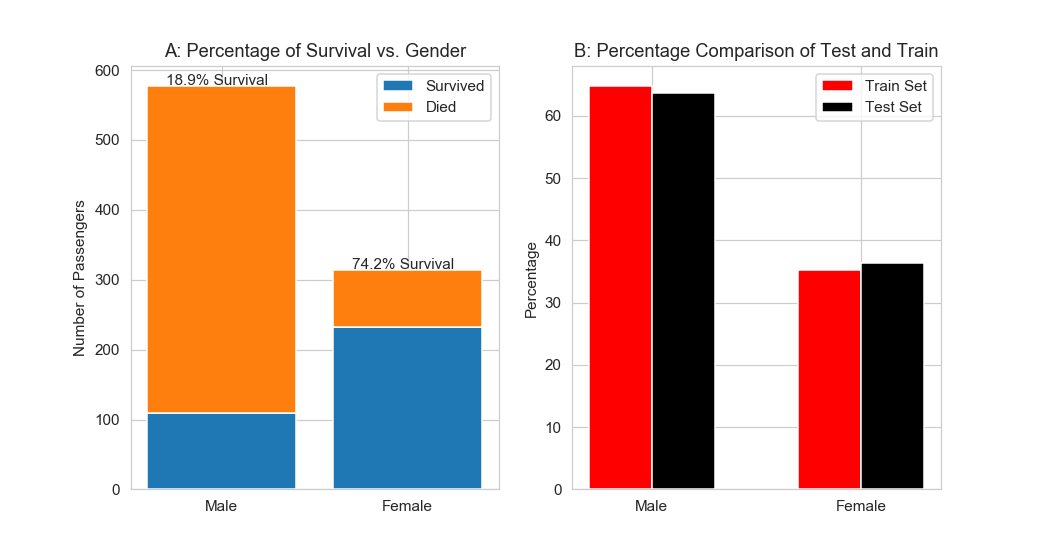

In [9]:
# male and female counts
male_counts = np.array(train_data["Survived"][train_data["Sex"] == 0].value_counts().sort_index())
female_counts = np.array(train_data["Survived"][train_data["Sex"] == 1].value_counts().sort_index())

# make a numpy array from the information
total_counts = np.vstack([male_counts, female_counts])

# get the survival percentage for each gender 
surv_gender = [male_counts[1]/sum(male_counts)*100, female_counts[1]/sum(female_counts)*100]

# Determine the percentage of males and females in test data 
counts_test = np.array(test_data["Sex"].value_counts().sort_index()) 
percentage = np.array([[sum(total_counts[0,:])*100/len(train_data), sum(total_counts[1,:])*100/len(train_data)] ,\
                       [counts_test[0]*100/len(test_data), counts_test[1]*100/len(test_data)]])

# plot the values 
fig0 = plt.figure(figsize=(9.5,5))
ax= fig0.add_subplot(121)

x = np.array([0,1])
plt.bar(x, total_counts[:,1], align='center', label="Survived")
plt.bar(x, total_counts[:,0], align='center', bottom=total_counts[:,1], label="Died")

plt.xticks(x, ['Male', 'Female'])
plt.legend()
plt.ylabel("Number of Passengers")
plt.title("A: Percentage of Survival vs. Gender")

j = 1
# set individual bar lables using above list of survival percentage
for i in ax.patches:
    if (j >= 3): #male 
        ax.text(i.get_x()+0.1,i.get_height()+ i.get_y()+1, str(round(surv_gender[j-3],1))+'% Survival' ) 
    j+=1

ax= fig0.add_subplot(122)    
width = 0.3 
plt.bar(x, percentage[0,:], width, label="Train Set", color='r')
plt.bar(x+width, percentage[1,:], width, label="Test Set", color='k')

plt.xticks(x+width/2, ['Male', 'Female'])
plt.ylabel("Percentage")
plt.title("B: Percentage Comparison of Test and Train")
plt.legend()

plt.show()

****
##### Figure 1A: Gender Breakdown 

This clearly demonstrates a bias towards Females. The movie definitely got this portion right. There is a much larger number of men aboard the titanic (almost 600), however they have only slightly over 100 survivors. On the other hand, the female survival rate looks quite good, they have around 225 survivors out of just over 300. 

For the purposes of our game and the "by hand" calculation of an individual’s survival, the gender will need to be weighted heavily towards the females. 

And I am going to assume that my other hypotheses about class based survival is probably correct.

##### Figure 1B: Percentage Comparison of Data Sets- Gender

The B sets of graphs in this section will compare the `test_data` set with the `train_data` set. By making these comparisons we can see if the `test_data` is a random subset of the `train_data` with approximately the same breakdown of demographics. If the training and test data have approximately the same demographics then the survival rate calculated by our machine learning algorithms and our "by-hand" calculation should be close to the overall titanic survival probability of 31.74%. Based on the gender breakdown of the test and train set, the percentage of male to female passengers in both are close, within a few percent of each other.

*****
## Survival by Class Section 
*****

Again, if our understanding of the class system in the time period is correct, then we will expect that the best place to be would be first, then second, then third class. 

<IPython.core.display.Javascript object>


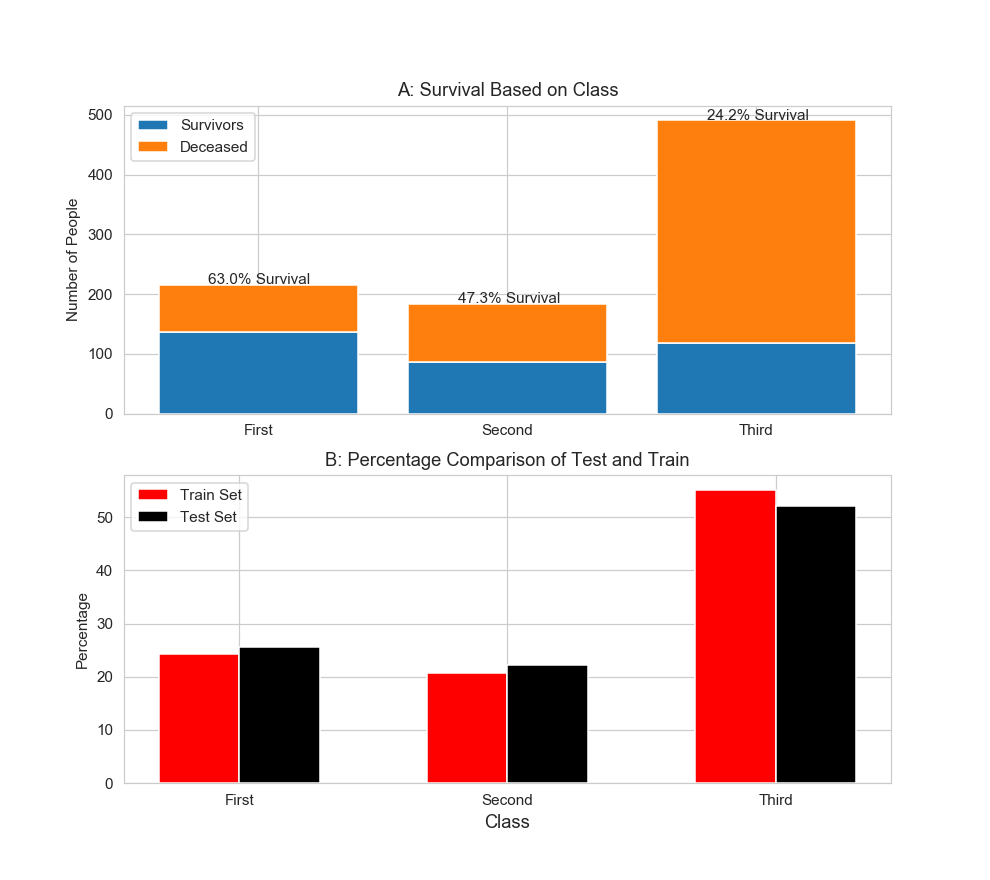

In [10]:
# breakdown of survival by class 
# create dictionary of survivors and fatalities by class 
dic_class ={}
dic_class['First'] = list(train_data["Survived"][train_data["Pclass"] == 1].value_counts().sort_index())
dic_class['Second'] = list(train_data["Survived"][train_data["Pclass"] == 2].value_counts().sort_index())
dic_class['Third'] = list(train_data["Survived"][train_data["Pclass"] == 3].value_counts().sort_index())

# breakdown of percentage of test set 
class_test = np.array(test_data["Pclass"].value_counts().sort_index())
class_test_per = np.array([ class_test[0]*100/len(test_data), class_test[1]*100/len(test_data), \
                           class_test[2]*100/len(test_data) ])

#create a list of the survival and total percentages
surv_class = []
class_total = []
for y in dic_class.keys(): 
    surv_class.append( dic_class[y][1]/sum(dic_class[y])*100 )
    class_total.append(sum(dic_class[y])*100/len(train_data) )

# plot the figures 
fig1 = plt.figure(figsize=(9,8))
ax= fig1.add_subplot(211)

# plot data stacked 
plt.bar(dic_class.keys(), np.array(list(dic_class.values()))[:,1], width=0.8, label='Survivors')
plt.bar(dic_class.keys(), np.array(list(dic_class.values()))[:,0], width=0.8, label='Deceased', \
        bottom= np.array(list(dic_class.values()))[:,1])

plt.legend(loc='best')
plt.title("A: Survival Based on Class")
plt.ylabel("Number of People")

j = 1
# set individual bar lables using above list of survival percentage
for i in ax.patches:
    if (j >= 4): 
        ax.text(i.get_x()+0.2,i.get_height()+ i.get_y()+1, str(round(surv_class[j-4],1))+'% Survival' ) 
    j+=1
    
ax= fig1.add_subplot(212)    
width = 0.3 
x = np.array([1,2,3])
plt.bar(x, class_total, width, label="Train Set", color='r')
plt.bar(x+width, class_test_per, width, label="Test Set", color='k')

plt.xticks(x+width/2, dic_class.keys())
plt.ylabel("Percentage")
plt.title("B: Percentage Comparison of Test and Train")
plt.xlabel("Class", FontSize=12)
plt.legend()

plt.show()

*****
##### Figure 2A: Survival by Class 

No surprise here, the classes are heavily biased towards first and second class. This is partly due to the social structure at the time but also the third-class passengers would have been at a disadvantage even if there wasn't that bias towards them. The ship struck the iceberg around 11:40 pm on April 14th 1912, which put most people in their cabins. For the third class their cabins were on E and F decks giving them less time to get out before the water started to flood their rooms. This could also account for the decrease in survival for the 2nd class passengers as well because they also were on these decks, but presumably were allowed to board the lifeboats with or just after the 1st class passengers.

##### Figure 2B: Percentage Comparison of Data Sets- Class

Again, we see only a small percentage difference in the number of people in each class across the training and testing data sets. This should mean that there is little to no effect on the hypothesized survival rate using our "by-hand" and ML algorithms.

***
## Survival by Port of Embarkment Section
****

For this I was not sure what the relationship would be, if any. From what I know about English culture I hypothesized that there might be a higher proportion of wealthy people boarding in England than in Ireland, causing a bias towards those that boarded in England vs. Ireland. In terms of the people who boarded in France, I was unsure, but from my limited understanding of Paris when I visited, I assumed that they might have a mix of poor and middle-class people. Who may have been spread quite evenly over 2nd and 3rd class.

<IPython.core.display.Javascript object>


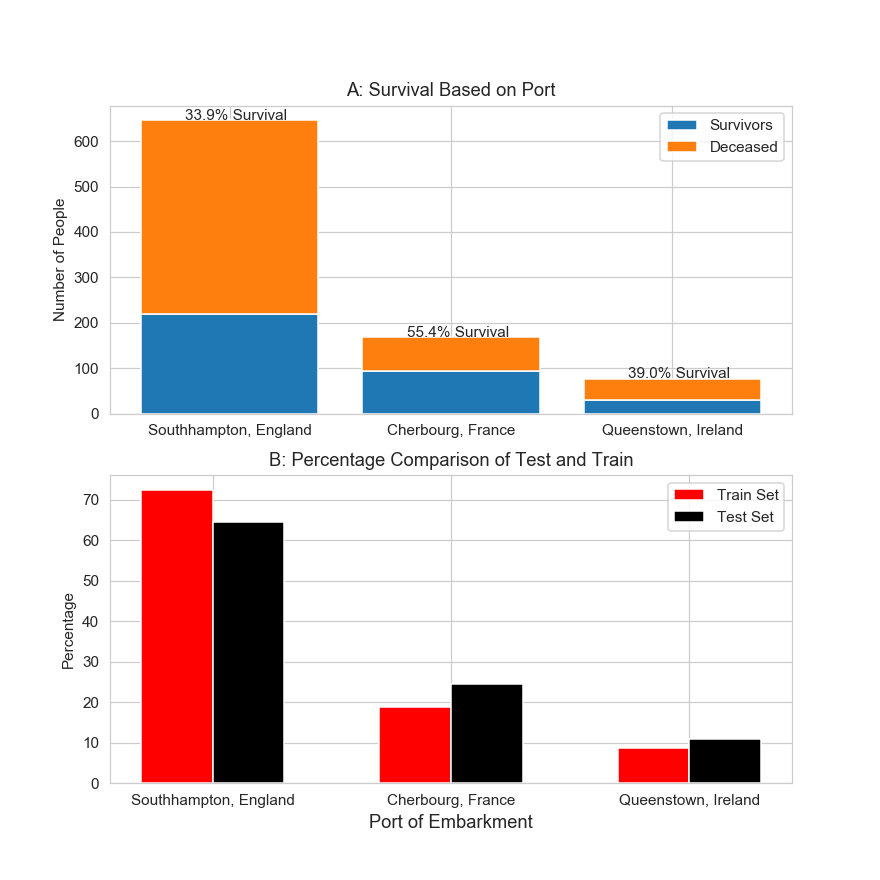

In [11]:
# breakdown of survival by port of embarkment 
# create dictionary of the values
port_dic = {}
port_dic['Southhampton, England']= list(train_data["Survived"][train_data["Embarked"] == 0]\
                                        .value_counts().sort_index())
port_dic['Cherbourg, France']= list(train_data["Survived"][train_data["Embarked"] == 1]\
                                    .value_counts().sort_index())
port_dic['Queenstown, Ireland']= list(train_data["Survived"][train_data["Embarked"] == 2]\
                                      .value_counts().sort_index())

# create array with the test data values 
port_test = np.array(test_data["Embarked"].value_counts().sort_index())
port_test_per = np.array([port_test[0]*100/len(test_data), port_test[1]*100/len(test_data),
                          port_test[2]*100/len(test_data) ])

# create survival and total percentage 
surv_port = [] 
port_total = []
for y in port_dic.keys(): 
    surv_port.append(port_dic[y][1]/sum(port_dic[y])*100)
    port_total.append(sum(port_dic[y])*100/len(train_data))

fig2 = plt.figure(figsize=(8,8))
ax= fig2.add_subplot(211)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(port_dic.keys(), np.array(list(port_dic.values()))[:,1], align='center', label='Survivors')
# top values: deaths 
plt.bar(port_dic.keys(), np.array(list(port_dic.values()))[:,0], \
        align='center', bottom=np.array(list(port_dic.values()))[:,1],label='Deceased' )

plt.legend(loc='best')
plt.title("A: Survival Based on Port")
plt.ylabel("Number of People")

j = 1
# set individual bar lables using above list of survival percentage
for i in ax.patches:
    if (j >= 4): 
        ax.text(i.get_x()+0.2,i.get_height()+ i.get_y()+1, str(round(surv_port[j-4], 1))+'% Survival' ) 
    j+=1

ax= fig2.add_subplot(212)   
width = 0.3 
x = np.array([1,2,3])
plt.bar(x, port_total, width, label="Train Set", color='r')
plt.bar(x+width, port_test_per, width, label="Test Set", color='k')

plt.xticks(x+width/2, port_dic.keys())
plt.ylabel("Percentage")
plt.title("B: Percentage Comparison of Test and Train")
plt.xlabel("Port of Embarkment", FontSize= 12)
plt.legend()
plt.show()

***
##### Figure 3A: Survival based on Port 

In terms of the survival percentages, my hypothesis about France doesn’t look too far off. They seem to have about a 50/50 chance of surviving. However, my hypothesis on the survival rates of England and Ireland was clearly way off. The survival percentages for both ports are within a few percent of each other and near the Titanic average survival rate of 1/3. Therefore, in the calculation of the survival of an individual from the test set of data, the weight attributed to this factor will be kept low.

##### Figure 3B: Percentage Comparison of Data Sets- Port

Here, there are some slight differences in the percentage of passengers who boarded, with the largest difference seen in England (7.91% lower than the training data set). The majority of this difference seems to have gone to a larger number of passengers boarding in France, which has a significantly higher survival rate. However, the increase of the number of passengers boarding in France is only 5.55% with the other 2.36% difference going to an increase in the number of Ireland passengers. So, **if** (I doubt it) this did have an effect on the overall survival rate calculated from the `test_data` set, it would likely be a very small increase. 

***
## Survival by Age Section 
*** 

This will be the section with the most assumptions. As was mentioned at the beginning, there are many (~10%) of the ages that have no values. This can be filled in with the average age or the median age of the number of passengers, however I am not satisfied with this approach at all. For now, I will use one of those two options until I have a working alternative solution. 

This section also is likely to see some bias towards children, and those who are older are hypothesized to be less likely to survive. The middle ages from 20-45 pose some problems, as they will have the largest number of passengers and therefore a undeterminable mix of men and women. Also, there is likely to be many ages with 5 or fewer counts in the statistics. Both of these points can easily throw off the statistics, but we are aware of them so keeping these pretty large assumptions in mind for this section is key.

<IPython.core.display.Javascript object>


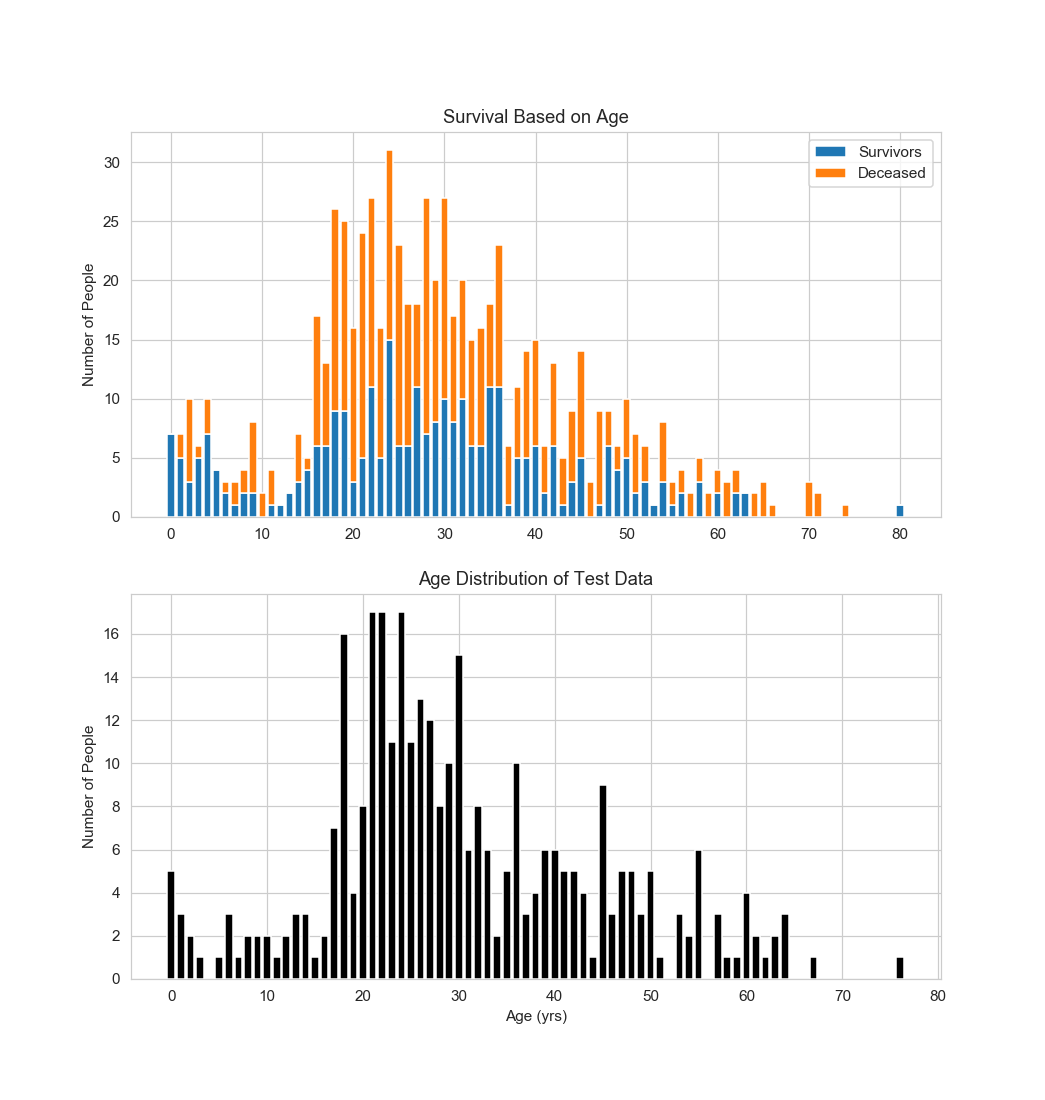

Number of NaN's in the Age category: 177
Mean Value: 30.272590361445783
Median Value: 27.0
Mode Value(s):
0    21.0
1    24.0
dtype: float64


In [12]:
##### breakdown of survival by age 
def make_Ord_dic(pd_data, dic):
    #fill ordered dictionary with data
    nan_count = 0
    for x in range(len(pd_data)): 
        age = pd_data.loc[x,"Age"]
        if np.isnan(age): 
            nan_count +=1
        else: 
            if int(age) not in dic: 
                dic[int(age)] = [0,0]
            if pd_data.loc[x,"Survived"] == 0: #died
                dic[int(age)][0] +=1
            else:# survived
                dic[int(age)][1] +=1
    
    dic = collections.OrderedDict(sorted(dic.items()))
    return dic, nan_count

# fill test_data dictionary 
def make_test_dic(pd_data, dic): 
    nan_count = 0 
    for x in range(len(pd_data)): 
        age = pd_data.loc[x,'Age']
        if np.isnan(age): 
            nan_count +=1
        else: 
            if int(age) not in dic: 
                dic[int(age)] = 0
            dic[int(age)] +=1
    dic = collections.OrderedDict(sorted(dic.items()))
    return dic, nan_count

# breakdown of survival by age 
order_dic = collections.OrderedDict()

# fill the ordered dictionary with [died, survivor] counts 
order_dic, na_num = make_Ord_dic(train_data, order_dic)

#look at breakdown of 
test_dic = collections.OrderedDict() 
test_dic, na_test = make_test_dic(test_data, test_dic)

fig3 = plt.figure(figsize=(9.5,10))
ax= fig3.add_subplot(211)

# (column number, value, alignment over the column, bottom = anything under it) survivors
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,1], align='center', label='Survivors')
plt.bar(order_dic.keys(), np.array(list(order_dic.values()))[:,0], \
        align='center', bottom=np.array(list(order_dic.values()))[:,1],label='Deceased' )

plt.legend(loc='best')
plt.title("Survival Based on Age")
plt.ylabel("Number of People")

ax= fig3.add_subplot(212)
plt.bar(test_dic.keys(), np.array(list(test_dic.values())), align='center', color='k')

plt.title("Age Distribution of Test Data")
plt.xlabel("Age (yrs)")
plt.ylabel("Number of People")

plt.show()
print("Number of NaN's in the Age category:", na_num)
print("Mean Value:", test_data["Age"].mean())
print("Median Value:", test_data["Age"].median())
print("Mode Value(s):", test_data["Age"].mode(), sep="\n")

***
##### Figure 4A: Survival based on Age 

This poses the largest source of error for both the "by-hand" and the machine learning methods of calculating survival. This is clearly not a Gaussian distribution. It looks like it could be a Gamma distribution between the ages of 12-80 and looks like a simple decreasing linear function for ages 11 and under.  Since there are 177 nan values in the data figuring out the likely age categories for these people and then assigning them accordingly could help fill in some of these statistics. 

Of course, anything that we do to this data will be based on some pretty big assumptions. The method that everyone seems to use is filling the nan values with the median value. Which based on the graph looking more Gamma-like than Gaussian-like through the bulk of the statistics is a better call then the mean value.

##### Figure 4B: Age Distribution of Test Data Set 

Obviously, presenting the age data as we have for all the other demographics would get very busy and confusing very fast. This certainly has the most chance of affecting the survival rate, because the same number of statistics are being categorized into a much larger number of groups (which means less statistics per bin/grouping). Somewhat reassuringly, we see the same general trend, just with smaller numbers since the `test_data` set has just slightly under half of the `train_data` set. A small somewhat decreasing function for ages 11 and under (although its more level in this area than the training data) and a Gaussian looking distribution with a peak for passengers in their early 20's. Another way of looking at this data might be to bin passengers into a child, young adult, middle age and old age categories and comparing their percentages with those of the training data (this will be tackled in future iterations of this workbook).

***
## Final Step: Creating the "By-Hand" predictions 
*** 

First, I will create another ordered dictionary, and write a small function that will fill it with the survival percentages based on age from the `order_dic`. 

Then comes the actual function to calculate our "by-hand" survival percentages.


In [13]:
# store survival percentage by age based on the above breakdown, so we can use it to calculate total survival 
def age_surv(dic_old, dic_new):
    for key,value in dic_old.items():
            dic_new[key] = value[1]/sum(value)*100
        
    return dic_new

surv_age = collections.OrderedDict()
surv_age = age_surv(order_dic, surv_age)

<IPython.core.display.Javascript object>


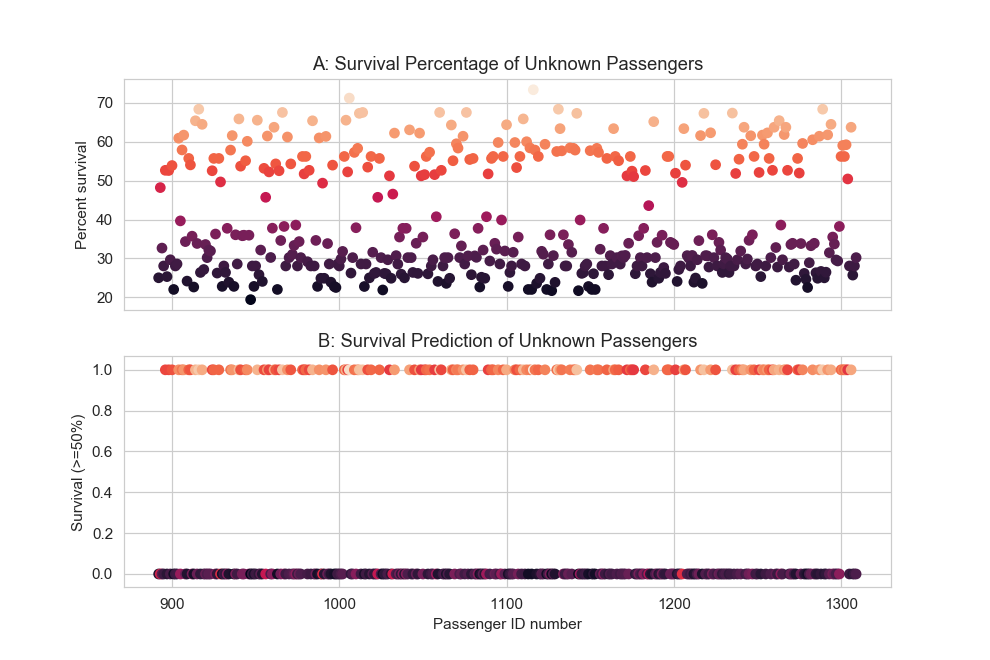

Number of survivors: 147
Total Number: 418
Death Rate: 64.832536


In [14]:
# lets build the function that will calculate the survival percentage of the train_data set 
def will_they_survive(data_set,tolerance,weights): 
    # data _set = pandas df, tolerence = percentage above which you need to have "survived", weights = array of 
    # decimals representing the influence of each category
    survive_byHand = []
    guess_array = []
    count = 0
    for x in range(len(data_set)): 
        sex_pcnt = surv_gender[data_set.loc[x,"Sex"]]
        class_pcnt = surv_class[data_set.loc[x,"Pclass"]-1]
        board_pcnt = surv_port[data_set.loc[x,"Embarked"]]
        
        p_age =  data_set.loc[x,'Age']        
        if int(p_age) not in surv_age: 
            # survival fraction of titanic in total 
            age_pcnt = 31.74
        else: 
            age_pcnt = surv_age[int(p_age)]
    
        total_pcnt = (sex_pcnt/100*weights[0] + class_pcnt/100*weights[1]\
                        + age_pcnt/100*weights[2] + board_pcnt/100*weights[3])*100
        if total_pcnt >=tolerance: #62.6424 is the titanic death rate 
            guess = 1
            count += 1
        else: 
            guess = 0
        guess_array.append(guess)
        survive_byHand.append([data_set.loc[x,"PassengerId"], total_pcnt])
    return np.array(survive_byHand, dtype='object'),guess_array, count
        
# for now filling the nan's of the age data with the median value
test_data["Age"] = test_data["Age"].fillna(test_data['Age'].median())

# using our new function to calculate the survival percentage
bh_pcnt, bh_guess, num_surv = will_they_survive(test_data,50,[.5,.25,.15,.10])  

# lets plot the results! 
fig4 = plt.figure(figsize=(9,6))
ax= fig4.add_subplot(211)

plt.scatter(bh_pcnt[:,0], bh_pcnt[:,1], c=bh_pcnt[:,1])
plt.title("A: Survival Percentage of Unknown Passengers")
plt.ylabel("Percent survival")
ax.label_outer()

ax= fig4.add_subplot(212)
plt.scatter(bh_pcnt[:,0], bh_guess[:],c=bh_pcnt[:,1])
plt.title("B: Survival Prediction of Unknown Passengers")
plt.ylabel("Survival (>=50%)")
plt.xlabel("Passenger ID number")

plt.show()

print("Number of survivors: %i"%num_surv, "Total Number: %i"%len(bh_guess),\
      "Death Rate: %f"%((len(bh_guess)-num_surv)/len(bh_guess)*100), sep="\n" )

***
##### Figure 5: Survival Probabilities and Predictions

A) Shows all the calculated probabilities of survival based on age, class, gender and port of embarkment as a function of the passenger ID. This relative scatter is something to be expected, as we done expect anyone's chances to be 0% or 100% survival. In fact, the lowest calculated percentage is passenger 947 at 19% survival, which turns out to be: Albert Rice a 10-year-old male in third class who boarded in France. The highest calculated percentage is passenger 1116 at 73% survival who is Mrs. Edward Candee, a 53-year-old first class female who boarded in England. There is a distinct separation of the data into two generalized sets, which is likely the male/female distinction. I will confirm this with an additional graph at a later date. 

B) If the survival percentage was above 50% then the person was classified as a "survivor" and given the value 1, and if it was below that threshold then they were classified as "deceased" and given a value of 0. As you might have suspected from the colour coding from graph A, those with the value 1 are fewer and consist of red and peach colouring mostly, and those with a value of 0 is mostly dark purple with a few scattered reds of just under that 50% threshold. Considering the assumptions and the simplicity of this "by-hand" calculation I am quite pleased to see that the death rate is 64.8% which is quite close to the overall death rate of 68.3%. Our simple calculation underestimates the death rate by only 3.5%.


# Machine Learning Algorithms

### I will use a decision tree and a random forest regressor to predict which passengers survive from the `test_data` set. This will allow 3 independent methods of calculating the survival of the passengers from the test set of data.

In [15]:
# Decision Tree 

# cant have nan's so fill age data for now... will come up with more accurate method soon 
median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(median)

# set up training values and prediction values 
surv_outcome = train_data['Survived'].values
training_features = train_data[['Pclass', 'Age', 'Sex', 'Embarked']].values

#making decision tree, max depth the tree should go to (to correct overfitting use <= # features), random_state to 
#   control the random number generator used (0/42 common),min_samples_split = number of samples required 
#   to split a node
dt = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=2, random_state= 42)

# train tree 
fit_dt = dt.fit(training_features, surv_outcome)

# look at the outcomes! 
# order of importance 
print('importance (%): [class, age, sex, port]', fit_dt.feature_importances_*100)
# r^2 of fit
dt_r2 = fit_dt.score(training_features, surv_outcome)
print('r^2 value:', dt_r2)
print(" ")

#lets see how accurate our r^2 values is by getting the mean of the scores
dt_scores = model_selection.cross_val_score(fit_dt, training_features, surv_outcome, scoring='accuracy', cv=10)
print('average r^2: ',dt_scores.mean())
print('difference r^2 - aver^2', dt_r2 - dt_scores.mean())

importance (%): [class, age, sex, port] [23.47689803 10.88621802 61.70498028  3.93190367]
r^2 value: 0.8282828282828283
 
average r^2:  0.818214731585518
difference r^2 - aver^2 0.010068096697310236


We have just trained our decision tree using our `train_data` data set. I have also printed out the features score of importance (represented as a percentage), we can see that our initial guess that the importance rank was Gender > Class > Age > Port of embarkment. Also, our primitive approach of essentially halving the importance (i.e. 50% > 25% > 15% > 10%) was also a relatively good approximation. The machine puts the score of the fit at ~0.83 which is ok, I have checked this by actually printing the average r^2 for the 10-fold cross validation score. These two values are within 0.01 of each other so we are unlikely to have over-fitted the data. 

We are now ready to run our Decision Tree algorithm on our test set.


In [16]:
# with the decision tree in place, lets run it on the test data 

# fill nan's on the test set 
test_med = test_data['Age'].median()
test_data["Age"] = test_data["Age"].fillna(test_med)

# predition values 
test_features = test_data[['Pclass', 'Age', 'Sex', 'Embarked']].values 

# random forest (rf) prediction
dt_survival = fit_dt.predict(test_features)

#percentage for each of the predictions 
dt_percent = fit_dt.predict_proba(test_features)

# lets look: 
survived_dt = np.count_nonzero(dt_survival)
died_dt = len(dt_survival)- np.count_nonzero(dt_survival)

print('Total number of predictions: '+str(len(dt_survival)),'Number of survivors: '+str(survived_dt),\
      'Number of fatalities: '+str(died_dt),'Death rate: '+str(died_dt/len(dt_survival)*100)+'%', sep="\n")

Total number of predictions: 418
Number of survivors: 107
Number of fatalities: 311
Death rate: 74.4019138755981%


Fantastic! We just ran our first ML prediction algorithm!  
The `test_data` set had 418 rows representing the passengers’ information. This method predicts only 107 survivors, and 311 deaths, creating a death rate of almost 75%, which is actually closer to the death rate of the crew (76.4%) than of the overall rate (68.3%) or the passenger rate (62.6%).  

Let see if the random forest algorithm gives a similar outcome:

In [17]:
# the random forest regressor 

# cant have nan's so fill age data for now... will come up with more accurate method soon 
median = train_data['Age'].median()
train_data['Age'] = train_data['Age'].fillna(median)

#set up the values we want the ML to use to predict and the values we want predicted
surv_outcome = train_data['Survived'].values
training_features = train_data[['Pclass', 'Age', 'Sex', 'Embarked']].values

#make the random forest: number of trees = 100, max_depth <= num of features, number of samples required 
#to split a node = 2, random_state to control the random number generator used (0/42 common),
# n_jobs of -1 means using all processors
rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth = 4, min_samples_split= 2, \
                                     random_state = 42, n_jobs = -1)

# fit forest 
fit_rf = rf.fit(training_features, surv_outcome)

# look at outcomes 
# order of importance 
print('importance (%): [class, age, sex, port]', fit_rf.feature_importances_*100)
# r^2 of fit
r2 = fit_rf.score(training_features, surv_outcome)
print('r^2 value:', r2)
print(" ")

#lets see how accurate our r^2 values is by getting the mean of the scores 
the_scores = model_selection.cross_val_score(fit_rf, training_features, surv_outcome, scoring='accuracy', cv=10)
print('average r^2: ',the_scores.mean())
print('difference r^2 - aver^2:', r2 -the_scores.mean())

importance (%): [class, age, sex, port] [22.91846376 13.95172661 58.77647032  4.35333931]
r^2 value: 0.835016835016835
 
average r^2:  0.8226591760299625
difference r^2 - aver^2: 0.012357658986872466


Here I have printed the same information as with the decision tree. We can see that the importance of the features is slightly different than the decision tree. Mostly the importance of gender has increased by ~4%, mostly by removing importance from the age and port categories. Also, we see that the machine has rated the fit as ~0.835 which is very close to the previous method. Of course, we have also checked this answer by using the cross-validation method in the same manner as before. Here we again get a difference between the average r^2 values from the curve validation of ~0.01. 

Now, let’s run the random forest on our test set and see how that compares:

In [18]:
# now that we have a trained forest, time to run it on the test_data 
# fill nan's 
test_med = test_data['Age'].median()
test_data["Age"] = test_data["Age"].fillna(test_med)

# predition values 
test_features = test_data[['Pclass', 'Age', 'Sex', 'Embarked']].values 

# random forest (rf) prediction
rf_survival = fit_rf.predict(test_features)

#get a percentage for each of the predictions 
rf_percent = fit_rf.predict_proba(test_features)

# lets look: 
survived_rf = np.count_nonzero(rf_survival)
died_rf = len(rf_survival)- np.count_nonzero(rf_survival)

print('Total number of predictions: '+str(len(rf_survival)),'Number of survivors: '+str(survived_rf),\
      'Number of fatalities: '+str(died_rf),'Death rate: '+str(died_rf/len(rf_survival)*100)+'%', sep="\n")

Total number of predictions: 418
Number of survivors: 115
Number of fatalities: 303
Death rate: 72.48803827751196%


So of course, the number of passengers being tested has not changed (418). However, there is a slight change in the number of survivors (115 vs. 107 previously) and therefore the death date has decreased to 72.5% (from 75%). This death rate of 72.5% is closer to the overall death rate (68.3%) by 2.5% from our decision tree, but is still off by ~4% (72.5-68.3). 

Now we have our three independent methods of calculating the survival, it’s time to see what differences they have predicted. Since the two ML algorithms have a much higher death rate than the "by-hand" calculations, we will expect that there will be a large number of passengers that the "by-hand" calculation determines survived whereas the ML algorithms will determine have died.

<IPython.core.display.Javascript object>


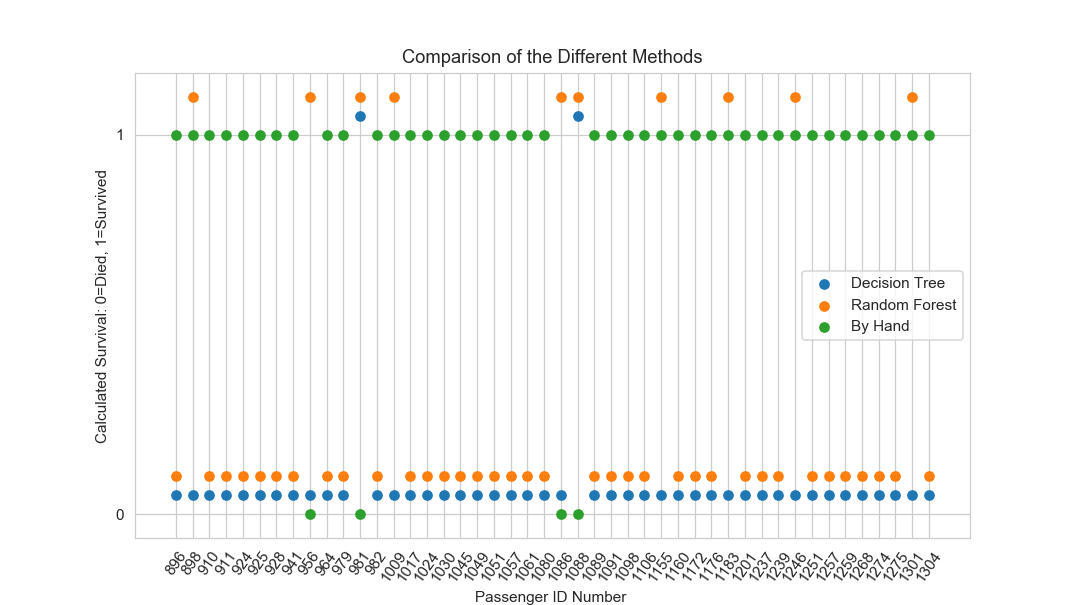

In [19]:
# lets visualize the results 
# lets look specifically at the people where the methods predicted differences 

# find the indexes that are different and put them in an array with their corresponding dt and rf values
graph_array = [] 
diff_index = [] # used below 
for x in range(len(dt_survival)):
    if (rf_survival[x] != bh_guess[x]):
        diff_index.append(x) # will use this to look at percentages
        graph_array.append([test_data.loc[x, "PassengerId"], dt_survival[x], rf_survival[x], bh_guess[x]]) 
    elif (dt_survival[x] != bh_guess[x]): 
        diff_index.append(x) # will use this to look at percentages
        graph_array.append([test_data.loc[x, "PassengerId"], dt_survival[x], rf_survival[x], bh_guess[x]]) 
    elif (dt_survival[x] != rf_survival[x]) : 
        diff_index.append(x) # will use this to look at percentages
        graph_array.append([test_data.loc[x, "PassengerId"], dt_survival[x], rf_survival[x], bh_guess[x]]) 
    else: 
        continue

#make a numpy array from the list 
graph_array = np.array(graph_array)

#plot the figure 
N = np.arange(len(graph_array))
fig5 = plt.figure(figsize=(9.8,5.5))
ax = fig5.add_subplot(111)

# plot scatter with PassengerId as x and dt_/rf_ survival as y 
plt.scatter(N, graph_array[:,1]+.05, label="Decision Tree")
plt.scatter(N, graph_array[:,2]+0.1, label ="Random Forest")
plt.scatter(N, graph_array[:,3], label="By Hand")

plt.legend()
plt.title("Comparison of the Different Methods")
plt.xlabel("Passenger ID Number ")
plt.ylabel("Calculated Survival: 0=Died, 1=Survived")
plt.xticks(N,graph_array[:,0],rotation=55)
plt.yticks([0,1])
plt.show()

***
##### Figure 6: Comparison of `test_data` Results

Here I have plotted the survival outcome (survived = 1 and died = 0) against the passenger ID number, to keep the points from overlapping one another I have simply adjusted the ML algorithms up slightly so we can see where each of the methods agrees and disagrees. As we expected there are many that both the ML methods disagree with the "by-hand" calculation. The interesting points are the ones where the ML methods disagree with each other and our "by-hand" calculation agrees with one over the other, and where the ML calculates survival and the "by-hand" method does not. 

The take away from this graph are that of the 46 differences in the calculations, the "by-hand" method disagrees with the ML methods 38/46 times (83%), the "by-hand" agrees with the random forest over the decision tree 6/46 times (13%) and the "by-hand" calculation agrees with the decision tree over the random forest 2/46 times (4%). Arguably, the method that should be the best is the random forest, since it generates a specified number of decision trees and uses statistics of all of these to get a better fit than just a single tree. So, the fact that the "by-hand" calculations agree more with this method is quite impressive for our super simple survival calculation.

Of the 38 times that the "by-hand" calculation disagrees with both ML algorithms, only 2/46 (4%) of those are where the ML algorithms calculate survival and the "by-hand" method doesn't. We would expect these to fall in the edge cases (very near the 50% survival mark) since those will likely be male children in the upper classes or females in third class.

<IPython.core.display.Javascript object>


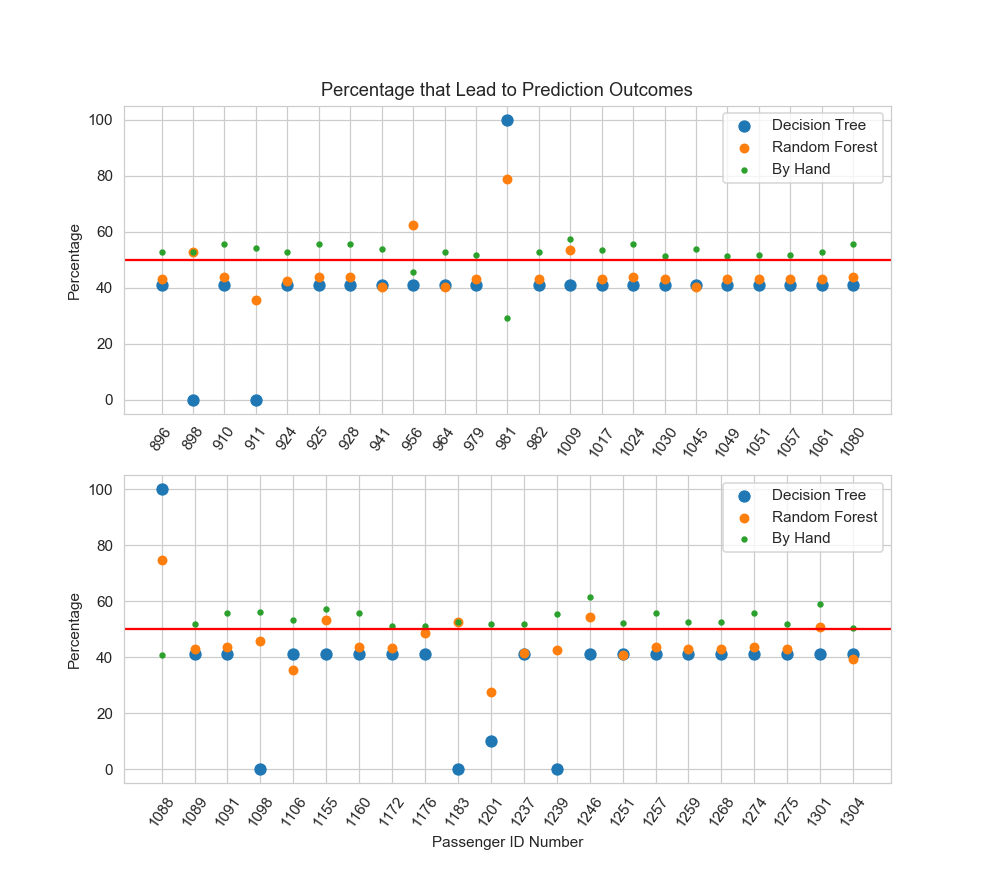

In [20]:
# lets look at the percentages that lead to the differences 
# using diff_index created above and the probabilities for dt and rf 

# add the survival percentage to each list 
dt_survive, rf_survive, bh_survive = [] , [], []
for x in diff_index:
    dt_survive.append([test_data.loc[x,"PassengerId"], dt_percent[x,1]*100])
    rf_survive.append([test_data.loc[x,"PassengerId"], rf_percent[x,1]*100])
    bh_survive.append([bh_pcnt[x,0], bh_pcnt[x,1]])
    
#make an array for easy graphing purposes
dt_survive = np.array(dt_survive, dtype='object')
rf_survive = np.array(rf_survive, dtype='object')
bh_survive = np.array(bh_survive, dtype='object')

# we have a lot of data points different so will plot them on 2 graphs by splitting the data set in half
N = np.arange(len(graph_array))
n = len(diff_index)//2
n2 = len(diff_index)

#plot the figures
fig11 = plt.figure(figsize=(9,8))
ax = fig11.add_subplot(211)

plt.scatter(N[0:n], dt_survive[0:n,1], label='Decision Tree', s=50)
plt.scatter(N[0:n], rf_survive[0:n,1], label='Random Forest',s=30)
plt.scatter(N[0:n], bh_survive[0:n,1], label='By Hand',s=10)
plt.axhline(y=50, color='r', linestyle='-')
plt.xticks(N[0:n], graph_array[0:n,0], rotation=55) 
plt.legend(loc='best')
plt.title("Percentage that Lead to Prediction Outcomes")
plt.ylabel("Percentage")

ax = fig11.add_subplot(212)

plt.scatter(N[n+1:n2], dt_survive[n+1:n2,1], label='Decision Tree',s=50)
plt.scatter(N[n+1:n2], rf_survive[n+1:n2,1], label='Random Forest',s=30)
plt.scatter(N[n+1:n2], bh_survive[n+1:n2,1], label='By Hand',s=10)
plt.axhline(y=50, color='r', linestyle='-')
plt.xticks(N[n+1:n2],graph_array[n+1:n2,0], rotation=55) 
# use the same passenger ID  
plt.legend(loc='best')
plt.ylabel("Percentage")
plt.xlabel("Passenger ID Number")
  
plt.show()

***
##### Figure 7: Comparison of `test_data` Percentages

These graphs show the actual percentage that led to the prediction of death or survival from Figure 5. These are split in to 2 graphs sorted from lowest to highest passenger ID number which are half of the total (23) found differences in the method predictions. This time, each method has a slightly different sized point so we can see overlapping points. Finally, I have added a horizontal line at the threshold percentage (50%) so we can easily see what point lie above and below this line.

The majority of the points fall between 40-60% with the "by-hand" calculation generally predicting the highest survival percentage of all three methods, not unexpected given the survival rates of the methods. What is interesting (and clearly systematic) is that the "by-hand" method predicts survival by what seems to be an almost constant (within a couple percent) difference from the other two methods. This will be down to the systematic differences in the way the survival percentage is calculated across the methods. 

The glaring issue with these graphs are the passengers where the decision tree predicts either 0 or 100% survival. I think this is really not possible, no passenger will have no chance of survival or will be guaranteed to survive, these are clearly in error. Of the 7 occurrences where the dt method predicts 0/100%: 2 (28.5%) are instances where our "by-hand" method agrees with the random forest, 2 (28.5%) are instance where the ML predicts survival and the "by-hand" method doesn't (2/2 times this actually occurs) and 3 (42.9%) where the ML predicts death and our "by-hand" calculation predicts survival.

I have calculated the minimum and maximum survival for all possible compinations for both male and female passengers using the random forest method. The results are outlined below: 
0. Male minimum and maximum survival probability: 
    - Min: 10.9% 
        - 3rd class, 58 years old, boarded in England
    - Max: 84.4% 
        - 2nd class, 0 years old, boarded in England
1. Female minumim and maximum survival probability: 
    - Min: 27.4%
        - 3rd class, 47 years old, boarded in England
    - Max: 96.1%
        - 1st class, 33 years old, boarded in France

### Summary 

To truly determine which of the three methods are more accurate we will need to see the proportion of: men vs. women, ages, class's and the port of embarkment that is in the data set. Assuming its evenly spread like the train data set then we would expect a total survival rate near that of the actual Titanic's survival rate. If they are not of similar to the train data set (i.e. there are way more men than women- by chance) then we would expect a lower survival rate than the overall Titanic survival. This is currently in progress..  